# Введение в анализ данных
## НИУ ВШЭ, 2019-2020 учебный год

### Домашнее задание №4

Задание выполнил(а): Селиванова Валерия

### Общая информация

__Дата выдачи:__ 18.05.2020

__Дедлайн:__ 23:59 29.05.2020


### Оценивание и штрафы

Оценка за ДЗ вычисляется по следующей формуле:

$$
min(\text{points}, 17)  \times 10 / 17,
$$

где points — количество баллов за обязательную часть, которое вы набрали. Максимальное число баллов, которое можно получить за обязательную часть — 17, если вы получите 19 или 20 баллов вы также получите 1 бонусный балл сверху. Также вы можете использовать бонусные баллы, которые накопили ранее.

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Инвайт для группы ИАД-6: rd5CNrr

Перед отправкой перезагрузите ноутбук и проверьте, что все ячейки могут быть последовательно выполнены. Ноутбук должен запускаться с использованием python 3.6+

In [2]:
import numpy as np
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from scipy import stats

## Random Forest своими руками (4 балла)

Реализуйте алгоритм случайного леса. В соответствии с построением алгоритма, ваша реализация должна сочетать в себе метод бэггинга и метод случайных подмножеств. Также она должна работать для двух типов задач: как для задачи регрессии, так и для задачи классификации.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn`.*

In [21]:
class RandomForest:
    def __init__(self, n_estimators, max_depth, max_features='sqrt', task_type='regression'):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        max_features - 'sqrt' for sqrt(n_features)
                       'log2' for log2(n_features)
                        None  for n_features 
                        as maximum features for each split in DecisionTree from sklearn
        task_type - 'regression' or 'classification'
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.task_type = task_type
        pass
        
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        self.X_train = X_train
        self.y_train = y_train
        obs = self.X_train.shape [0]
        self.est = []
        if self.task_type == 'regression':
            for k in range (self.n_estimators):
                self.a = DecisionTreeRegressor (splitter = 'best', max_depth = self.max_depth, max_features = self.max_features)
                b = np.random.choice (obs, obs)
                sX = self.X_train [b]
                sy = self.y_train [b]
                c = self.a.fit (sX, sy)
                self.est.append (c)
        else:
            for k in range (self.n_estimators):
                self.a = DecisionTreeClassifier (splitter = 'best', max_depth = self.max_depth, max_features = self.max_features)
                b = np.random.choice (obs, obs)
                sX = self.X_train [b]
                sy = self.y_train [b]
                c = self.a.fit (sX, sy)
                self.est.append (c)
        self.est = np.array (self.est)
                
        pass
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        self.X_test = X_test
        self.p = []
        for i in self.est:
            self.p.append (i.predict (self.X_test))
        self.p = np.array (self.p)
        if self.task_type == 'regression':
            y_pred = np.mean (self.p, axis = 0)
        else:
            y_pred = stats.mode (self.p, axis = 0).mode [0]

        return y_pred

Проверьте вашу реализацию на задаче регрессии. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10.25 **(не меняйте параметры сида)**.

In [22]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [31]:
np.random.seed(19052019)

f = RandomForest (n_estimators = 3000, max_depth = None, max_features = 'log2', task_type = 'regression')
f.fit (X_train, y_train)
y_pred = f.predict (X_test)

In [32]:
mean_squared_error(y_test, y_pred)

10.05369450939271

Проверьте вашу реализацию на задаче классификации. Подберите оптимальные гиперпараметры, чтобы получить accuracy > 0.83 **(не меняйте параметры сида)**.

In [33]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [35]:
np.random.seed(19052019)

f = RandomForest (n_estimators = 3000, max_depth = None, max_features = None, task_type = 'classification')
f.fit (X_train, y_train)
y_pred = f.predict (X_test)

In [36]:
accuracy_score(y_test, y_pred)

0.9020979020979021

## Градиентный бустинг своими руками (5 + 1 баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним основные формулы.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$. Однако чтобы получить дополнительный 1 балл вам нужно реализовать нахождение оптимального $\gamma_N$ на каждом шаге.

В качестве функции потерь возьмите MSE (какая у него будет производная?).

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [37]:
# это вам может помочь для поиска оптимальных гамма

from scipy.optimize import minimize

In [178]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        pass
        
    def fit(self, X_train, y_train):
        """
        INPUT:
        X_train - np.array of shape (k, d)
        y_train - np.array of shape (k,)
        """
        a = DecisionTreeRegressor (max_depth = self.max_depth)
        self.b = [a.fit (X_train, y_train), ]
        for k in range (self.n_estimators - 1):
            a = DecisionTreeRegressor (max_depth = self.max_depth)
            p1 = self.learning_rate * np.ones (len (self.b))
            p2 = np.array ([a.predict (X_train) for a in self.b])
            d = y_train - (p1@ p2)
            a = a.fit (X_train, d)
            self.b.append (a)
        pass
        
    def predict(self, X_test):
        """
        INPUT:
        X_test - np.array of shape (m, d)
        
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        p1 = self.learning_rate * np.ones (len (self.b))
        p2 = np.array ([a.predict (X_test) for a in self.b])
        y_pred = p1 @ p2
        
        return y_pred

Проверьте вашу реализацию. Подберите оптимальные гиперпараметры, чтобы получить MSE < 10 как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**.

In [179]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [186]:
np.random.seed(19052019)

boost = GradientBoosting (n_estimators = 100, max_depth = 6, learning_rate = 0.2)
boost.fit (X_train, y_train)
y_pred = boost.predict (X_test)

In [187]:
mean_squared_error(y_test, y_pred)

9.567320579558826

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

Нет

## Ансамблевые методы (10 баллов)

Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [94]:
data = pd.read_csv('diabetes.csv')

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

In [95]:
data.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Нули имеют смысл в колонках, отвечающих за количество беременностей и наличие диабета. Помимо них, нули есть в переменных `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`. Эти показатели не должны быть равны нулю у человека. Следовательно, нули здесь отвечают за пропуски.

In [98]:
data ['Glucose'] = data ['Glucose'].replace ({0 : np.mean (data['Glucose'])})
data ['BloodPressure'] = data ['BloodPressure'].replace ({0 : np.mean (data['BloodPressure'])})
data ['SkinThickness'] = data ['SkinThickness'].replace ({0 : np.mean (data['SkinThickness'])})
data ['Insulin'] = data ['Insulin'].replace ({0 : np.mean (data['Insulin'])})
data ['BMI'] = data ['BMI'].replace ({0 : np.mean (data['BMI'])})

In [99]:
data.describe ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Нулей в указанных переменных больше нет

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

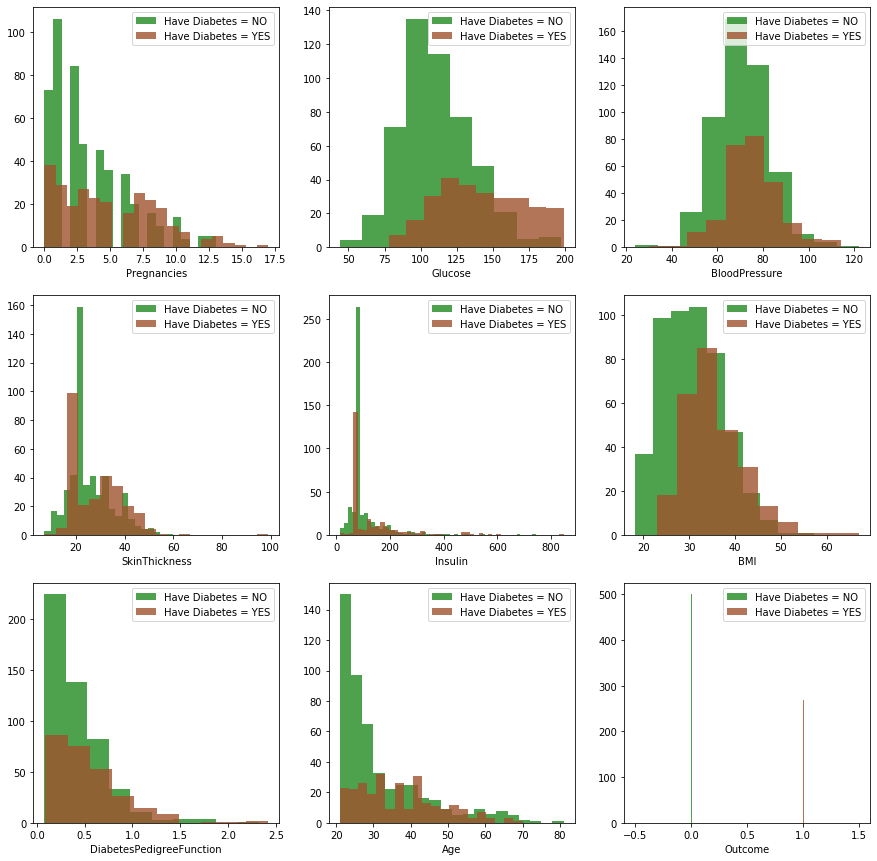

In [136]:
fig, ax = plt.subplots (3, 3, figsize = (15, 15))
ax [0][0].hist (data [data ['Outcome'] == 0] ['Pregnancies'], bins = 20, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [0][0].hist (data [data ['Outcome'] == 1] ['Pregnancies'], bins = 20, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [0][0].set_xlabel ('Pregnancies')
ax [0][0].legend()

ax [0][1].hist (data [data ['Outcome'] == 0] ['Glucose'], bins = 10, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [0][1].hist (data [data ['Outcome'] == 1] ['Glucose'], bins = 10, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [0][1].set_xlabel ('Glucose')
ax [0][1].legend()

ax [0][2].hist (data [data ['Outcome'] == 0] ['BloodPressure'], bins = 10, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [0][2].hist (data [data ['Outcome'] == 1] ['BloodPressure'], bins = 10, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [0][2].set_xlabel ('BloodPressure')
ax [0][2].legend()

ax [1][0].hist (data [data ['Outcome'] == 0] ['SkinThickness'], bins = 20, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [1][0].hist (data [data ['Outcome'] == 1] ['SkinThickness'], bins = 20, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [1][0].set_xlabel ('SkinThickness')
ax [1][0].legend()

ax [1][1].hist (data [data ['Outcome'] == 0] ['Insulin'], bins = 50, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [1][1].hist (data [data ['Outcome'] == 1] ['Insulin'], bins = 50, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [1][1].set_xlabel ('Insulin')
ax [1][1].legend()

ax [1][2].hist (data [data ['Outcome'] == 0] ['BMI'], bins = 10, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [1][2].hist (data [data ['Outcome'] == 1] ['BMI'], bins = 10, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [1][2].set_xlabel ('BMI')
ax [1][2].legend()

ax [2][0].hist (data [data ['Outcome'] == 0] ['DiabetesPedigreeFunction'], bins = 10, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [2][0].hist (data [data ['Outcome'] == 1] ['DiabetesPedigreeFunction'], bins = 10, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [2][0].set_xlabel ('DiabetesPedigreeFunction')
ax [2][0].legend()

ax [2][1].hist (data [data ['Outcome'] == 0] ['Age'], bins = 20, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [2][1].hist (data [data ['Outcome'] == 1] ['Age'], bins = 20, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [2][1].set_xlabel ('Age')
ax [2][1].legend()

ax [2][2].hist (data [data ['Outcome'] == 0] ['Outcome'], bins = 100, label = 'Have Diabetes = NO', color = 'forestgreen', alpha = 0.8)
ax [2][2].hist (data [data ['Outcome'] == 1] ['Outcome'], bins = 100, label = 'Have Diabetes = YES', color = 'sienna', alpha = 0.8)
ax [2][2].set_xlabel ('Outcome')
ax [2][2].legend()

plt.show ()

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [205]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import os

In [199]:
X_train, X_test, y_train, y_test = train_test_split (data.drop ('Outcome', axis = 1), data ['Outcome'], test_size = 0.3, random_state = 21)

In [200]:
b = BaggingClassifier (n_estimators = 10, base_estimator = DecisionTreeClassifier(), random_state = 10)
b.fit (X_train, y_train)
ab = accuracy_score (y_test, b.predict (X_test))
rb = precision_score (y_test, b.predict (X_test))
pb = recall_score (y_test, b.predict (X_test))
print (ab, rb, pb)

0.7489177489177489 0.7301587301587301 0.5287356321839081


In [201]:
fo = RandomForestClassifier (n_estimators = 10, random_state = 10)
fo.fit (X_train, y_train)
af = accuracy_score (y_test, fo.predict (X_test))
rf = precision_score (y_test, fo.predict (X_test))
pf = recall_score (y_test, fo.predict (X_test))
print (af, rf, pf)

0.7229437229437229 0.7446808510638298 0.40229885057471265


Видно, что бэггинг показал себя лучше RF по всем покзателям, кроме precision. Возможно, это связано с тем, что RF показывает свои преимущества при довольно большом количестве деревьев, когда доля ошибки выходит на асимптоту - случайный лес не переобучается.

**4. (2 балла)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [203]:
np.random.seed (21)
df = []
for i in np.arange (10, 1500, 70):
    for k in np.arange (1, 60, 10):
        f = RandomForestClassifier (n_estimators = i, min_samples_leaf = k)
        f.fit (X_train, y_train)
        fp = f.predict (X_test)
        far = accuracy_score (y_test, fp)
        df.append (np.array ([i, k, far]))
df = np.array (df)
df = pd.DataFrame (df, columns = ['n_estimators', 'min_samples_leaf', 'AUC-ROC'])

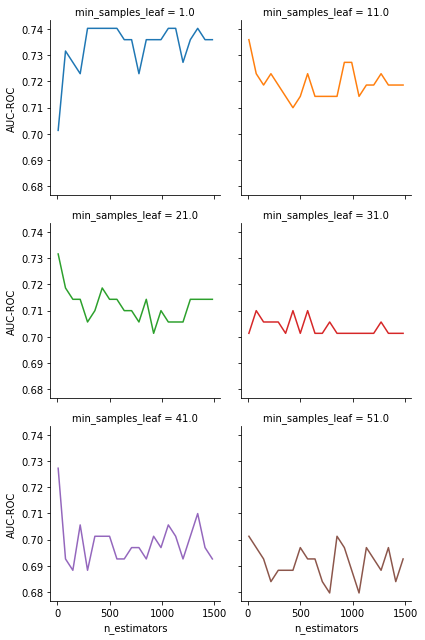

In [209]:
a = sns.FacetGrid (df, col = 'min_samples_leaf', hue = 'min_samples_leaf', col_wrap = 2)
a = a.map (plt.plot, 'n_estimators', 'AUC-ROC')

Только на первом графике повышается значение AUC-ROC. Это происходит потому, что в данном случае конечная модель состоит из наиболее глубоких деревьев, что повышает AUC-ROC.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

In [211]:
f = RandomForestClassifier (n_estimators = 200, min_samples_leaf = 1, random_state = 21)
f.fit (X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None]
  color or c: color
  contains: callable
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font_properties: `.font_manager.FontProperties`
  fontsize or size: {size in points, 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontweight or w

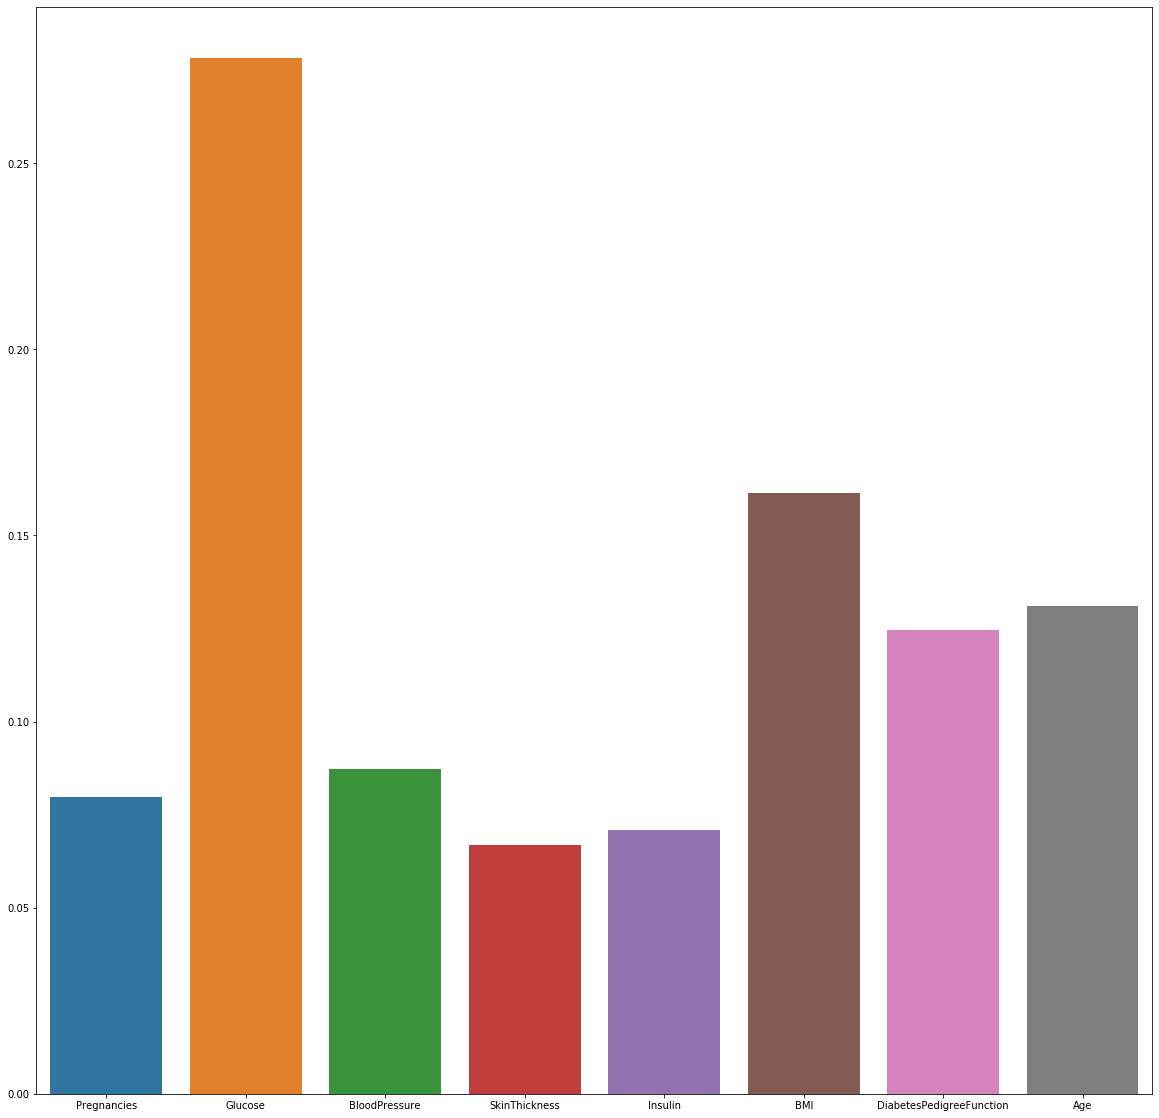

In [219]:
plot = plt.figure (figsize = (20, 20))
a = sns.barplot (data.columns [:8], f.feature_importances_)
plt.setp (a.get_xticklabels ())
plt.show ()

Признаки от самого важного к наименее важному: `Glucose`, `BMI`, `Age`, `DiabetesPedigreeFunction`, `BloodPressure`, `Pregnancies`, `Insulin`, `SkinThickness`.

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [220]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

HistGradientBoostingClassifier отличается от GradientBoostingClassifier по нескольким параметрам. Во-первых, первый алгоритм направлен на то, чтобы работать быстрее и оптимизировать использоваине памяти. Он использует разбиение признаков на дискретные промежутки, что увеличивает скорость работы. Во-вторых, дерево строится, так сказать, по листу: признаки отбираются по отдельным вершинам, а не по всему дереву сразу. В-третьих, работа с категориальными лучше в первом алгоритме, так как он не требует обрабатывать их отдельно.

Оптимальное количество деревьев было подобрано методом, по сути, перебора.

In [223]:
b = GradientBoostingClassifier(n_estimators = 2 ** 4, random_state = 21)
b.fit (X_train, y_train)
ab = accuracy_score (y_test, b.predict (X_test))
rb = precision_score (y_test, b.predict (X_test))
pb = recall_score (y_test, b.predict (X_test))
print (ab, rb, pb)

0.7012987012987013 0.7045454545454546 0.3563218390804598


In [224]:
bh = HistGradientBoostingClassifier (learning_rate = 1, random_state = 21)
bh.fit (X_train, y_train)
abh = accuracy_score (y_test, bh.predict (X_test))
rbh = precision_score (y_test, bh.predict (X_test))
pbh = recall_score (y_test, bh.predict (X_test))
print (abh, rbh, pbh)

0.7142857142857143 0.6779661016949152 0.45977011494252873


HistGradientBoostingClassifier показал себя лучше на всех метриках, кроме precision.

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классификатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [227]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

ImportError: cannot import name 'StackingClassifier' from 'sklearn.ensemble' (/Users/valeria/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/__init__.py)

In [228]:
estimators = [('gb', GradientBoostingClassifier(n_estimators = 2 ** 4, random_state = 21)),
('dt', DecisionTreeClassifier(random_state = 21))]

stack = StackingClassifier(estimators = estimators, fest = LogisticRegression())
stack.fit(X_train, y_train)

NameError: name 'StackingClassifier' is not defined

In [229]:
ast = accuracy_score (y_test, stack.predict (X_test))
rst = precision_score (y_test, stack.predict (X_test))
pst = recall_score (y_test, stack.predict (X_test))
print (ast, rst, pst)

NameError: name 'stack' is not defined

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>